# South African Language Identification Hack 2022

© Tosin Adebowale

<a id="shorthand"></a>

## Table of Contents

<a href=#zero>0. Comet</a>

<a href=#one>1. Packages</a>

<a href=#two>2. Data</a>

<a href=#three>3. Data Description</a>

<a href=#four>4. Data Cleaning</a>

* <a href=#four_zero>4.0. General data cleaning</a>

* <a href=#four_one>4.1. StopWords</a>

* <a href=#four_two>4.2. Tokenisation</a>

* <a href=#four_three>4.3. Stemming</a>

* <a href=#four_four>4.4. Lemmatization</a>

* <a href=#four_five>4.5. Resampling</a>

<a href=#five>5. Model Files</a>

* <a href=#five_zero>5.0. Prepare features</a>

* <a href=#five_one>5.1. Scaling features</a>

* <a href=#five_two>5.2. Prepare label</a>

* <a href=#five_three>5.3. Train_Test_Split</a>

<a href=#six>6. Modelling</a>

* <a href=#six_zero>6.0. Improve model individually</a>

* <a href=#six_one>6.1. Model Performance</a>

* <a href=#six_two>6.2. Run all models</a>

* <a href=#six_three>6.3. Kaggle Submission</a>

<a href=#seven>7. End Comet Experiment</a>

<a href=#eight>8. Extra</a>

<a id="zero"></a>
## 0. Comet
<a href=#shorthand>Back to Table of Contents</a>

---
    
## <center>| ⚡ Description ⚡ |

**<center>Importing comet and and setting up experiments.<center>**

---

In [90]:
# pip install comet_ml

In [91]:
# # Import comet_ml at the top of your file

# from comet_ml import Experiment

In [92]:
# # Create an experiment with your api key and details specific to your personal comet

# experiment = Experiment(
#     api_key="qsOVXkhUhq870yZ5QARvTqNEw",
#     project_name="south-african-language-identification-2022",
#     workspace="toarstn92",
# )

<a id="one"></a>
## 1. Packages
<a href=#shorthand>Back to Table of Contents</a>

---
    
## <center>| ⚡ Description ⚡ |

**<center>Importing and briefly discussing libraries used during analysis and modelling.<center>**

**<center>Downloading nltk corpora of interest.<center>**

---

In [93]:
# pip install libraries that fails to import

# pip install "package name"

In [2]:
# import necessary libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap
import seaborn as sns
import re
import string
from spellchecker import SpellChecker
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from plotly import graph_objs as go
import plotly.express as px
from collections import Counter
from varname import nameof
from PIL import Image
import pickle

from gensim.models import Word2Vec
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MaxAbsScaler, MinMaxScaler, LabelEncoder
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report
from sklearn.utils import resample
from sklearn import pipeline
from sklearn.naive_bayes import MultinomialNB
import nltk
from nltk.tokenize import word_tokenize, TreebankWordTokenizer
from nltk.stem import WordNetLemmatizer
from nltk import SnowballStemmer, PorterStemmer, LancasterStemmer
from nltk.corpus import stopwords
from nltk.util import ngrams

import time

# set plot style

sns.set()

# suppress cell warnings

# import warnings
# warnings.filterwarnings("ignore")

In [95]:
# download nltk content

# nltk.download("wordnet")
# nltk.download("stopwords")
# nltk.download("omw-1.4")

In [3]:
# set output options for all categories

pd.set_option("max_colwidth", 500)
plt.rcParams["figure.figsize"] = (10, 7)

<a id="two"></a>
## 2. Data
<a href=#linkup>Back to Table of Contents</a>

---
    
## <center>| ⚡ Description ⚡ |

**<center>Loading data into DataFrame.<center>**

---

In [4]:
# load data

lang = pd.read_csv("data/train_set.csv")
lang.head()

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko axhasa ulawulo lwesininzi kunye nokuthath inxaxheba kwabafazi ezi ziquka phakathi kwezinye zazo ikomishoni yokulingana ngokwesini ikomishoni yamalungelo oluntu lomzantsi afrika
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi naphi na kwisebe ngokusekwe kwiimfuno zokusebenza zalo emva kokubonana nomsebenzi kunye okanye imanyano yakhe ukuba ulandulo lomntu onjalo alufanelekanga i-dha mayibize uncedo olufanelekileyo elungelweni layo
2,eng,the province of kwazulu-natal department of transport invites tenders from established contractors experienced in bridge construction for the construction of the kwajolwayo tugela river pedestrian bridge near tugela ferry the duration of the project will be months
3,nso,o netefatša gore o ba file dilo ka moka tše le dumelelanego ka tšona mohlala maleri a magolo a a šomišwago go fihlelela meagong e metelele scaffolds a a bolokegilego lefelo la maleba la go šomela go phela gabotse bjbj
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana u ya nga mulayo wa khomishini ya ndinganyiso ya mbeu u thetshelesa mbilaelo dzine dza tshimbilelana na tshialula u ya nga mbeu nahone i ivhea sa foramu ya thungo u ya nga mulayo wa ndinganyiso


<a id="three"></a>
## 3. Data Description
<a href=#linkup>Back to Table of Contents</a>

---
    
## <center>| ⚡ Description ⚡ |

The data is in the form Language ID, Text. The text is in various states of cleanliness. Some NLP techniques will be necessary to clean up the data.

**File descriptions**

    train_set.csv - the training set
    test_set.csv - the test set
    sample_submission.csv - a sample submission file in the correct format

**Language IDs**

    afr - Afrikaans
    eng - English
    nbl - isiNdebele
    nso - Sepedi
    sot - Sesotho
    ssw - siSwati
    tsn - Setswana
    tso - Xitsonga
    ven - Tshivenda
    xho - isiXhosa
    zul - isiZulu
    
---

In [6]:
# create copy to describe data

describe = lang.copy()

In [7]:
# observe data size

describe.shape

(33000, 2)

In [8]:
languages = list(describe["lang_id"].unique())
print(languages, len(languages))

['xho', 'eng', 'nso', 'ven', 'tsn', 'nbl', 'zul', 'ssw', 'tso', 'sot', 'afr'] 11


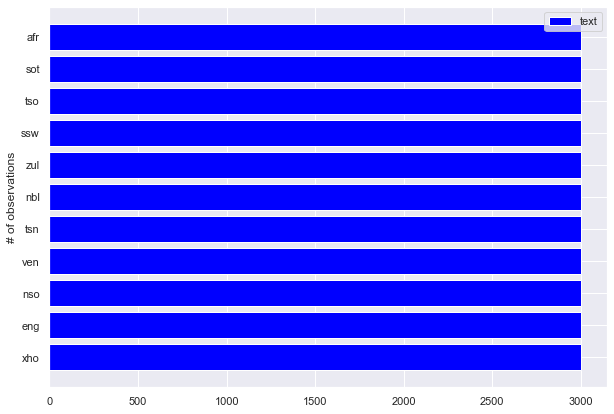

In [10]:
heights = []
for i in languages:
    new = describe[describe["lang_id"]==i]
    heights.append(len(new))

plt.barh(languages,heights,color="blue")
plt.yticks(languages)
plt.ylabel("# of observations")
plt.legend(["text"])
plt.show()

In [11]:
# function to create wordcloud; word representation of data

def grey_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    # callable function for wordcloud.color_func that overwrites colormap and returns a PIL color for each word
    return("hsl(0, 100%%, %d%%)" % 100) # change values to set color need in hsl format

def wordcloud_draw(data, color="black", max_font_size=100, figure_size=(12, 12), title = None, title_size=30, image_color=True):
    """ 
    Takes in one DataFrame as data

            Parameters
            ----------
            color: str
                Background color of output
                
            max_font_size: int
                Smallest font size to use. Will stop when there is no more room in this size
                
            figure_size: int tuple
                output size
                
            title: str
                wordcloud title
                
            title_size: int
                font size of title

            image_color: bool
                if True, display word with different colors
                elif False, display all words in white

            Returns
            -------
            Wordcloud
    """
    words = " ".join(data)
    cleaned_word = " ".join([word for word in words.split()])
    wordcloud = WordCloud(background_color=color,
                      width=1500,
                      height=1000,
                      random_state=42,
                      max_font_size = max_font_size
                     ).generate(cleaned_word)
    
    plt.figure(figsize=figure_size)
    if image_color:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={"size": title_size, "color": "black", 
                                  "verticalalignment": "bottom"})
    else:
        plt.imshow(wordcloud.recolor(color_func=grey_color_func), interpolation="bilinear");
        plt.title(title, fontdict={"size": title_size,  
                                  "verticalalignment": "bottom"})
    plt.axis("off");
    plt.tight_layout()

In [12]:
wordcloud_draw(describe["text"], color="black", max_font_size=100, figure_size=(12, 12), title_size=30, title="South African Words")

<a id="four"></a>
## 4. Data Cleaning
<a href=#linkup>Back to Table of Contents</a>

---
    
## <center>| ⚡ Description ⚡ |

**<center>Cleaning the Data.<center>**

---

<a id="four_zero"></a>
### 4.0. General data cleaning

<a href=#four>Back to Data Cleaning</a>

In [16]:
# create copy to clean data

clean = describe.copy()

In [17]:
# confirm values in sentiment column

sentiment_labels = list(clean["sentiment"].unique())
print(sentiment_labels)

[1, 2, 0, -1]


In [18]:
# remove non-ASCII characters

clean["message"] = clean.loc[:, "message"].str.encode("ascii", "ignore").str.decode("ascii")

In [19]:
# replace patterns with general nomenclature or blank space

pattern_replace = {r'(@([\w]|[!"#$%&""()*+,-./:;<=>?@[\]^`{|}~])+)': "Username", 
                   r'(https://t.co/([\w]|[!"#$%&""()*+,-./:;<=>?@[\]^`{|}~])+)': "urlweb",
                   r'(\r|\n|https)': " "
                   }

clean.replace({"message": pattern_replace}, regex=True, inplace=True)

In [20]:
# function to remove punctuation, numbers andchange uppercase to lower

def remove_punctuation_numbers_caps(message):
    punc_numbers = string.punctuation + "0123456789"
    return "".join([l.lower() for l in message if (l not in punc_numbers) or (len(l)>=3)])

clean["message"] = clean["message"].apply(remove_punctuation_numbers_caps)

In [21]:
clean.head()

,sentiment,message
tweetid,,
625221,1,polyscimajor epa chief doesnt think carbon dioxide is main cause of global warming and wait what urlweb via username
126103,1,its not like we lack evidence of anthropogenic global warming
698562,2,rt username researchers say we have three years to act on climate change before its too late urlweb urlweb
573736,1,todayinmaker wired was a pivotal year in the war on climate change urlweb
466954,1,rt username its and a racist sexist climate change denying bigot is leading in the polls electionnight


In [22]:
# function to interactively display most Common words in data

def common_words(data, word_qty=30, arrange="Least"):
    """ 
    Takes in column from DataFrame as data

            Parameters
            ----------
            word_qty: int
                Number of words to display
                
            arrange: str
                if Least, display least occuring words
                elif Most, display most occuring words

            Returns
            -------
            interactive plot display
    """
    df = data.apply(lambda x:str(x).split())
    top = Counter([item for sublist in df for item in sublist])
    if "Least" in arrange:
        temp = pd.DataFrame(top.most_common()[::-1])[:word_qty]
    elif "Most" in arrange:
        temp = pd.DataFrame(top.most_common())[:word_qty]
    temp.columns = ["common_words","count"]
    temp.style.background_gradient(cmap="Blues")
    fig = px.bar(temp, x="count", y="common_words", title=arrange+" Commmon Words in Tweet",
                orientation="h", width=700, height=700,color="common_words")
    return fig.show()

In [23]:
common_words(clean["message"], 30, arrange="Most")

<a id="four_one"></a>
### 4.1. StopWords

<a href=#four>Back to Data Cleaning</a>

In [24]:
# create copy to remove stopwords

clean_sw = clean.copy()

In [25]:
# function to remove stopwords

def remove_stop_words(post):
    return " ".join([t for t in post.split() if t not in stopwords.words("english")])

clean_sw["clean"] = clean_sw["message"].apply(remove_stop_words)

In [26]:
clean_sw.head()

,sentiment,message,clean
tweetid,,,
625221,1,polyscimajor epa chief doesnt think carbon dioxide is main cause of global warming and wait what urlweb via username,polyscimajor epa chief doesnt think carbon dioxide main cause global warming wait urlweb via username
126103,1,its not like we lack evidence of anthropogenic global warming,like lack evidence anthropogenic global warming
698562,2,rt username researchers say we have three years to act on climate change before its too late urlweb urlweb,rt username researchers say three years act climate change late urlweb urlweb
573736,1,todayinmaker wired was a pivotal year in the war on climate change urlweb,todayinmaker wired pivotal year war climate change urlweb
466954,1,rt username its and a racist sexist climate change denying bigot is leading in the polls electionnight,rt username racist sexist climate change denying bigot leading polls electionnight


<a id="four_two"></a>
### 4.2. Tokenisation

<a href=#four>Back to Data Cleaning</a>

In [27]:
# create copy to tokenize

token = clean_sw.copy()

In [28]:
tokeniser = TreebankWordTokenizer()
token["tokens"] = token["clean"].apply(tokeniser.tokenize)

In [29]:
token["tokens"].iloc[4895]

['rt',
 'username',
 'elected',
 'president',
 'believes',
 'climate',
 'change',
 'hoax',
 'veered',
 'chinese',
 'government']

<a id="four_three"></a>
### 4.3. Stemming

<a href=#four>Back to Data Cleaning</a>

In [110]:
# create copy to stem words using stemmer

stemmed = token.copy()

In [111]:
sb_stemmer = SnowballStemmer("english")
port_stemmer = PorterStemmer()
lanc_stemmer = LancasterStemmer()
# "english"

def word_stemmer(words, stemmer):
    # stem words in DataFrame column
    return [stemmer.stem(word) for word in words]

In [112]:
stemmed["sb_stem"] = stemmed["tokens"].apply(word_stemmer, args=(sb_stemmer, ))
stemmed["port_stem"] = stemmed["tokens"].apply(word_stemmer, args=(port_stemmer, ))
stemmed["lanc_stem"] = stemmed["tokens"].apply(word_stemmer, args=(lanc_stemmer, ))

In [122]:
# confirm stemmer function
row = 356

for i, t in enumerate(stemmed.iloc[row]["tokens"]):    
    print ("{:40s} --> {:30s} --> {:20s} --> {:10s}".format(t, stemmed.iloc[row]["sb_stem"][i], stemmed.iloc[row]["port_stem"][i], stemmed.iloc[row]["lanc_stem"][i]))

rt                                       --> rt                             --> rt                   --> rt        
username                                 --> usernam                        --> usernam              --> usernam   
ok                                       --> ok                             --> ok                   --> ok        
crochet                                  --> crochet                        --> crochet              --> crochet   
addict                                   --> addict                         --> addict               --> addict    
global                                   --> global                         --> global               --> glob      
warming                                  --> warm                           --> warm                 --> warm      
blanket                                  --> blanket                        --> blanket              --> blanket   
stripes                                  --> stripe                     

<a id="four_four"></a>
### 4.4. Lemmatization

<a href=#four>Back to Data Cleaning</a>

In [123]:
# create copy to stem words using lemmatizer

lemmad = stemmed.copy()

In [124]:
lemmatizer = WordNetLemmatizer()

def word_lemma(words, lemmatizer):
    # lemmatize words in DataFrame column
    return [lemmatizer.lemmatize(word) for word in words]  

In [125]:
lemmad["lemma"] = lemmad["tokens"].apply(word_lemma, args=(lemmatizer, ))

In [126]:
# confirm lemmatizer function

for i, t in enumerate(lemmad.iloc[2162]["tokens"]):    
    print ("{:20s} --> {:10s}".format(t, lemmad.iloc[2162]["lemma"][i]))

rt                   --> rt        
username             --> username  
lefts                --> left      
meltdown             --> meltdown  
causing              --> causing   
global               --> global    
warming              --> warming   
whywemustimpeachtrumpinwords --> whywemustimpeachtrumpinwords


<a id="four_five"></a>
### 4.5. Resampling

<a href=#four>Back to Data Cleaning</a>

In [38]:
# create copy to resample sentiment category

resampling = lemmad.copy()

In [39]:
# separate out sentiments

news_re = resampling[resampling["sentiment"]==2]
pro_re = resampling[resampling["sentiment"]==1]
neutral_re = resampling[resampling["sentiment"]==0]
anti_re = resampling[resampling["sentiment"]==-1]

In [40]:
# data size to resample to
class_size = int(len(pro)*0.8) # 80% of maxinum class size

# Downsample majority
pro_downsampled = resample(pro_re,
                           replace=False, # sample without replacement (no need to duplicate observations)
                           n_samples=class_size,
                           random_state=42)

# Upsample minority
news_upsampled = resample(news_re,
                          replace=True, # sample with replacement (we need to duplicate observations)
                          n_samples=class_size,
                          random_state=42)

newtral_upsampled = resample(neutral_re,
                             replace=True,
                             n_samples=class_size,
                             random_state=42)

anti_upsampled = resample(anti_re,
                          replace=True,
                          n_samples=class_size,
                          random_state=42)

resampled = pd.concat([pro_downsampled, news_upsampled, newtral_upsampled, anti_upsampled])

# confirm new class counts
resampled["sentiment"].value_counts()

 1    6824
 2    6824
 0    6824
-1    6824
Name: sentiment, dtype: int64

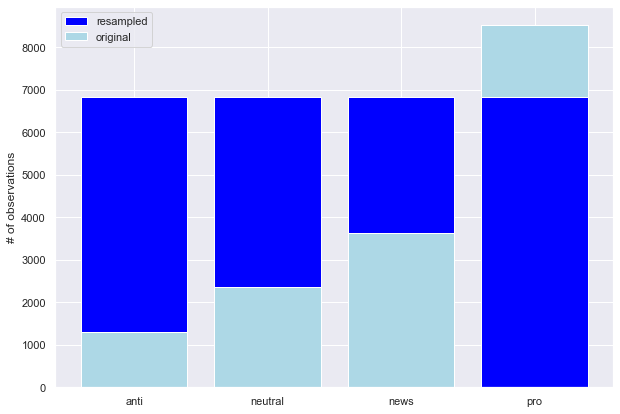

In [41]:
# plot resampling process

heights1 = [len(resampled[resampled["sentiment"]==2]), len(pro), len(neutral), len(anti)]
heights2 = [len(news), len(pro), len(resampled[resampled["sentiment"]==0]), len(anti)]
heights3 = [len(news), len(pro), len(neutral), len(resampled[resampled["sentiment"]==-1])]
heights4 = [len(news), len(resampled[resampled["sentiment"]==1]), len(neutral), len(anti)]

# Get all possible labels
labels = resampling["sentiment"].unique()
plt.bar(labels,heights1,color=["blue", "lightblue", "lightblue", "lightblue"])
plt.bar(labels,heights2,color=["lightblue", "lightblue", "blue", "lightblue"])
plt.bar(labels,heights3,color=["lightblue", "lightblue", "lightblue", "blue"])
plt.bar(labels,heights4,color=["lightblue", "blue", "lightblue", "lightblue"])
plt.xticks(labels,["news", "pro", "neutral", "anti"])
plt.ylabel("# of observations")
plt.legend(["resampled", "original"])
plt.show()

In [42]:
resampled.head()

,sentiment,message,clean,tokens,stem,lemma
tweetid,,,,,,
555359,1,rt username watch beforetheflood right here as username travels the world to tackle climate change urlweb htt,rt username watch beforetheflood right username travels world tackle climate change urlweb htt,"[rt, username, watch, beforetheflood, right, username, travels, world, tackle, climate, change, urlweb, htt]","[rt, usernam, watch, beforetheflood, right, usernam, travel, world, tackl, climat, chang, urlweb, htt]","[rt, username, watch, beforetheflood, right, username, travel, world, tackle, climate, change, urlweb, htt]"
504402,1,rt username we have a presidentelect who doesnt believe in climate change millions of people are going to have to say mr t,rt username presidentelect doesnt believe climate change millions people going say mr,"[rt, username, presidentelect, doesnt, believe, climate, change, millions, people, going, say, mr]","[rt, usernam, presidentelect, doesnt, believ, climat, chang, million, peopl, go, say, mr]","[rt, username, presidentelect, doesnt, believe, climate, change, million, people, going, say, mr]"
559217,1,rt username fed court has ruled rights of username youth threatened by climate change help them proceed to trial,rt username fed court ruled rights username youth threatened climate change help proceed trial,"[rt, username, fed, court, ruled, rights, username, youth, threatened, climate, change, help, proceed, trial]","[rt, usernam, fed, court, rule, right, usernam, youth, threaten, climat, chang, help, proceed, trial]","[rt, username, fed, court, ruled, right, username, youth, threatened, climate, change, help, proceed, trial]"
936602,1,rt username the us elected trump but the rest of the world didntso what do we do if us policies eg climate change threaten the re,rt username us elected trump rest world didntso us policies eg climate change threaten,"[rt, username, us, elected, trump, rest, world, didntso, us, policies, eg, climate, change, threaten]","[rt, usernam, us, elect, trump, rest, world, didntso, us, polici, eg, climat, chang, threaten]","[rt, username, u, elected, trump, rest, world, didntso, u, policy, eg, climate, change, threaten]"
639182,1,rt username we have a presidentelect who doesnt believe in climate change thats frightening for this country and the world,rt username presidentelect doesnt believe climate change thats frightening country world,"[rt, username, presidentelect, doesnt, believe, climate, change, thats, frightening, country, world]","[rt, usernam, presidentelect, doesnt, believ, climat, chang, that, frighten, countri, world]","[rt, username, presidentelect, doesnt, believe, climate, change, thats, frightening, country, world]"


<a id="five"></a>
## 5. Model Files
<a href=#linkup>Back to Table of Contents</a>

---
    
## <center>| ⚡ Description ⚡ |

**<center>Preparing data to train model with.<center>**

---

<a id="five_zero"></a>
### 5.0. Prepare features

<a href=#five>Back to Model Files</a>

In [127]:
# create copy to prepare data

prepare = lemmad.copy()

In [128]:
# convert important column from list to str

prepare["sb_stem_str"] = [" ".join(map(str, l)) for l in prepare["sb_stem"]]
prepare["port_stem_str"] = [" ".join(map(str, l)) for l in prepare["port_stem"]]
prepare["lanc_stem_str"] = [" ".join(map(str, l)) for l in prepare["lanc_stem"]]
prepare["lemma_str"] = [" ".join(map(str, l)) for l in prepare["lemma"]]

prepare.head()

,sentiment,message,clean,tokens,sb_stem,port_stem,lanc_stem,lemma,sb_stem_str,port_stem_str,lanc_stem_str,lemma_str
tweetid,,,,,,,,,,,,
625221,1,polyscimajor epa chief doesnt think carbon dioxide is main cause of global warming and wait what urlweb via username,polyscimajor epa chief doesnt think carbon dioxide main cause global warming wait urlweb via username,"[polyscimajor, epa, chief, doesnt, think, carbon, dioxide, main, cause, global, warming, wait, urlweb, via, username]","[polyscimajor, epa, chief, doesnt, think, carbon, dioxid, main, caus, global, warm, wait, urlweb, via, usernam]","[polyscimajor, epa, chief, doesnt, think, carbon, dioxid, main, caus, global, warm, wait, urlweb, via, usernam]","[polyscimas, ep, chief, doesnt, think, carbon, dioxid, main, caus, glob, warm, wait, urlweb, via, usernam]","[polyscimajor, epa, chief, doesnt, think, carbon, dioxide, main, cause, global, warming, wait, urlweb, via, username]",polyscimajor epa chief doesnt think carbon dioxid main caus global warm wait urlweb via usernam,polyscimajor epa chief doesnt think carbon dioxid main caus global warm wait urlweb via usernam,polyscimas ep chief doesnt think carbon dioxid main caus glob warm wait urlweb via usernam,polyscimajor epa chief doesnt think carbon dioxide main cause global warming wait urlweb via username
126103,1,its not like we lack evidence of anthropogenic global warming,like lack evidence anthropogenic global warming,"[like, lack, evidence, anthropogenic, global, warming]","[like, lack, evid, anthropogen, global, warm]","[like, lack, evid, anthropogen, global, warm]","[lik, lack, evid, anthropog, glob, warm]","[like, lack, evidence, anthropogenic, global, warming]",like lack evid anthropogen global warm,like lack evid anthropogen global warm,lik lack evid anthropog glob warm,like lack evidence anthropogenic global warming
698562,2,rt username researchers say we have three years to act on climate change before its too late urlweb urlweb,rt username researchers say three years act climate change late urlweb urlweb,"[rt, username, researchers, say, three, years, act, climate, change, late, urlweb, urlweb]","[rt, usernam, research, say, three, year, act, climat, chang, late, urlweb, urlweb]","[rt, usernam, research, say, three, year, act, climat, chang, late, urlweb, urlweb]","[rt, usernam, research, say, three, year, act, clim, chang, lat, urlweb, urlweb]","[rt, username, researcher, say, three, year, act, climate, change, late, urlweb, urlweb]",rt usernam research say three year act climat chang late urlweb urlweb,rt usernam research say three year act climat chang late urlweb urlweb,rt usernam research say three year act clim chang lat urlweb urlweb,rt username researcher say three year act climate change late urlweb urlweb
573736,1,todayinmaker wired was a pivotal year in the war on climate change urlweb,todayinmaker wired pivotal year war climate change urlweb,"[todayinmaker, wired, pivotal, year, war, climate, change, urlweb]","[todayinmak, wire, pivot, year, war, climat, chang, urlweb]","[todayinmak, wire, pivot, year, war, climat, chang, urlweb]","[todayinmak, wir, pivot, year, war, clim, chang, urlweb]","[todayinmaker, wired, pivotal, year, war, climate, change, urlweb]",todayinmak wire pivot year war climat chang urlweb,todayinmak wire pivot year war climat chang urlweb,todayinmak wir pivot year war clim chang urlweb,todayinmaker wired pivotal year war climate change urlweb
466954,1,rt username its and a racist sexist climate change denying bigot is leading in the polls electionnight,rt username racist sexist climate change denying bigot leading polls electionnight,"[rt, username, racist, sexist, climate, change, denying, bigot, leading, polls, electionnight]","[rt, usernam, racist, sexist, climat, chang, deni, bigot, lead, poll, electionnight]","[rt, usernam, racist, sexist, climat, chang, deni, bigot, lead, poll, electionnight]","[rt, usernam, rac, sex, clim, chang, deny, bigot, lead, pol, electionnight]","[rt, use

In [45]:
common_words(prepare["lemma_str"], 30, arrange="Most")

In [46]:
# create counter object for each sentiment label

column = "lemma"
news_words = Counter([item for sublist in prepare[prepare["sentiment"]==2][column] for item in sublist])
pro_words = Counter([item for sublist in prepare[prepare["sentiment"]==1][column] for item in sublist])
neutral_words = Counter([item for sublist in prepare[prepare["sentiment"]==0][column] for item in sublist])
anti_words = Counter([item for sublist in prepare[prepare["sentiment"]==-1][column] for item in sublist])

In [48]:
def tab_common_words(data, word_qty=30, arrange="Least"):
    """ 
    Takes in list of counter objects as data

            Parameters
            ----------
            word_qty: int
                Number of words to display
                
            arrange: str
                if Least, display least occuring words
                elif Most, display most occuring words

            Returns
            -------
            Tabulated display of word and count of all words in each sentiment
    """
    start = pd.DataFrame()
    i=2 # highest label value
    for info in data:
        if "Least" in arrange:
            df = pd.DataFrame(info.most_common()[::-1])[:word_qty]
        elif "Most" in arrange:
            df = pd.DataFrame(info.most_common())[:word_qty]
        df.columns = ["Common_words","count"]
        start["Common_words "+str(i)] = df["Common_words"]
        start["count "+str(i)] = df["count"]
        i=i-1 # move backwars from highest label value
    
    return start

In [49]:
def words_unique(data=prepare, column="lemma", word_qty=30, sentiment=[2, "News"], arrange="Least"):
    """ 
    Takes in DataFrame as data

            Parameters
            ----------
            column: str
                Column label in data
            
            word_qty: int
                Number of words to display
                
            sentiment: list of one int and one str
                int represents sentiment label int
                str represents sentiment label str

            arrange: str
                if Least, display least occuring words
                elif Most, display most occuring words

            Returns
            -------
            Tabulated display of word and count of words unique to each sentiment in descending order of count
    """
    raw_words = [word for word_list in data[column] for word in word_list]

    allother = list(set([word for word_list in data[data["sentiment"]!=sentiment[0]][column] for word in word_list]))
    
    specific_only = [x for x in raw_words if x not in allother]
    
    mycounter = Counter()
    
    for item in data[data["sentiment"]==sentiment[0]][column]:
        for word in item:
            mycounter[word]+=1
    
    keep = list(specific_only)
    
    for word in list(mycounter):
        if word not in keep:
            del mycounter[word]
    
    if "Least" in arrange:
        unique_words = pd.DataFrame(mycounter.most_common()[::-1], columns = [sentiment[1]+" words",sentiment[1]+" count"])[:word_qty]
    elif "Most" in arrange:
        unique_words = pd.DataFrame(mycounter.most_common(), columns = [sentiment[1]+" words",sentiment[1]+" count"])[:word_qty]
    
    return unique_words

In [50]:
sentiment_words = [news_words, pro_words, neutral_words, anti_words]
common_words = tab_common_words(sentiment_words, word_qty=30, arrange="Most")

In [51]:
unique_news = words_unique(sentiment=[2, "News"], arrange="Most")
unique_pro = words_unique(sentiment=[1, "pro"], arrange="Most")
unique_neutral = words_unique(sentiment=[0, "Neutral"], arrange="Most")
unique_anti = words_unique(sentiment=[-1, "Anti"], arrange="Most")
unique_all = (unique_news.join(unique_pro.join(unique_neutral.join(unique_anti))))

In [52]:
mearge_words = common_words.join(unique_all)
mearge_words.style.background_gradient(cmap="Blues")

,Common_words 2,count 2,Common_words 1,count 1,Common_words 0,count 0,Common_words -1,count -1,News words,News count,pro words,pro count,Neutral words,Neutral count,Anti words,Anti count
0,urlweb,3907,username,8460,username,2183,username,1381,reuters,22,imvotingbecause,62,interviewer,22,noncompetitive,23
1,climate,3350,climate,7365,climate,1444,climate,800,emanuel,11,installing,56,geographics,6,enlist,13
2,change,3267,change,7188,change,1411,change,756,parking,11,actonclimate,49,kentut,6,hysteria,7
3,username,2713,rt,5797,rt,1091,rt,684,teen,11,bleached,39,penyebab,6,patriot,7
4,rt,2151,urlweb,3893,global,1039,global,635,herald,10,prochoice,34,utama,6,lefty,6
5,trump,1066,global,1597,warming,1004,warming,612,cautiously,10,ivotedbecause,33,ang,6,leftist,5
6,global,508,warming,1451,urlweb,825,urlweb,500,octopus,10,therell,26,karena,5,globalist,4
7,warming,442,trump,1100,trump,177,amp,84,unconvinced,10,fossi,25,gaga,5,zealot,4
8,say,307,believe,1005,u,130,science,78,garage,9,virtually,23,fri,5,doctrine,4
9,via,302,doesnt,788,amp,101,u,68,worldnews,9,betwe,21,dari,5,sally,3


In [193]:
# transform chosen column to vector using word frequency

vect = CountVectorizer(ngram_range=(1,3))
X = vect.fit_transform(prepare["lemma_str"])

# max_df=5000
# min_df=5
# tokenizer=StemTokenizer()
# strip_accents="ascii"
# stop_words=new_stops
# ngram_range=(1,3)

In [52]:
# transform chosen column to vector using Term Frequency (TF) and Document Frequency (DF)
# Term frequency-inverse document frequency (TFIDF)

# tfidfconverter = TfidfTransformer()
# X_tfid = tfidfconverter.fit_transform(X).toarray()

In [53]:
# tfidfconverter = TfidfVectorizer(norm = None)
# X_tfid_tans = tfidfconverter.fit_transform(prepare["lemma_str"]).toarray()

In [54]:
# tfidf_vectorizer = TfidfVectorizer(use_idf=True)
# X_vectors_tfidf = tfidf_vectorizer.fit_transform(prepare["lemma_str"])

In [158]:
# observe list of selected words and their count

word_list = vect.get_feature_names_out()
count_list = np.asarray(X.sum(axis=0))[0]

# plt.hist([v for v in count_list], color="blue")
# plt.ylabel("# of words havin count")
# plt.xlabel("word count")

print(word_list, len(word_list))
# print(dict(zip(word_list, count_list)))

['aaa' 'aaaaaaaaaaa' 'aaaaaand' ... 'zoo' 'zum' 'zwizku'] 14825


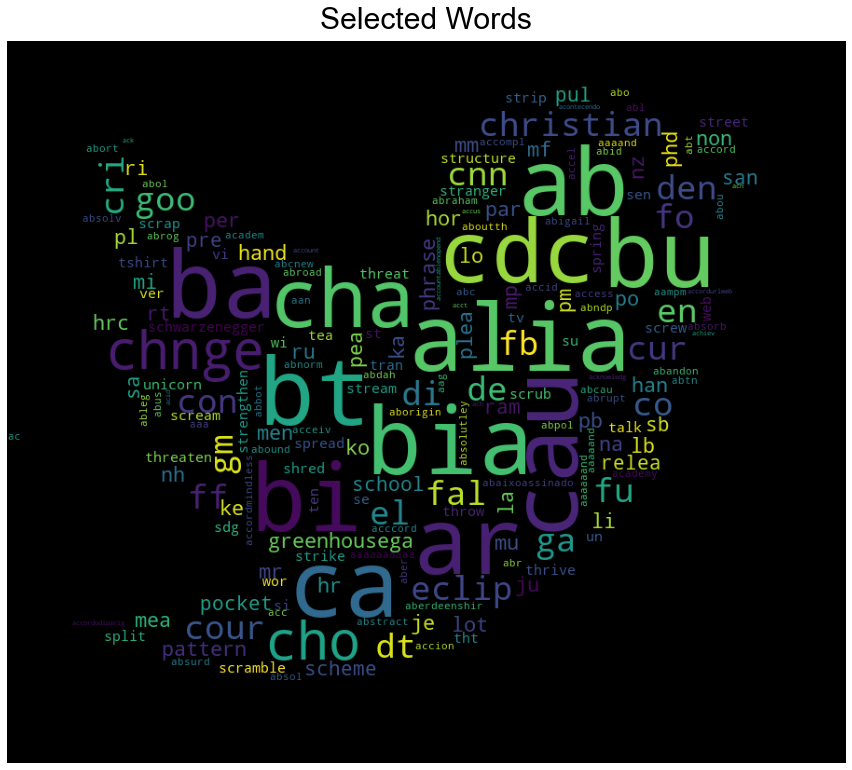

In [99]:
wordcloud_draw(word_list, color="black", max_font_size=100, title_size=30, title="Selected Words")

<a id="five_one"></a>
### 5.1. Scaling features

<a href=#five>Back to Model Files</a>

In [195]:
X_df = pd.DataFrame(X.A)

X_df.head()

,0,1,2,3,4,5,6,7,8,9,...,185789,185790,185791,185792,185793,185794,185795,185796,185797,185798
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [198]:
min_max_scaler = MinMaxScaler()
X_minmax = min_max_scaler.fit_transform(X.A)

X_minmax_df = pd.DataFrame(X_minmax)
X_minmax_df.head()

MemoryError: Unable to allocate 21.9 GiB for an array with shape (15819, 185799) and data type int64

In [59]:
# standard_scaler = StandardScaler()
# X_standard = standard_scaler.fit_transform(X.A)

# X_standard_df = pd.DataFrame(X_standard)
# X_standard_df.head()

In [58]:
maxabs_scaler = MaxAbsScaler()
X_maxabs = maxabs_scaler.fit_transform(X.A)

X_maxabs_df = pd.DataFrame(X_maxabs)
X_maxabs_df.head()

,0,1,2,3,4,5,6,7,8,9,...,12146,12147,12148,12149,12150,12151,12152,12153,12154,12155
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<a id="five_two"></a>
### 5.2. Prepare label

<a href=#five>Back to Model Files</a>

In [60]:
y = tweet["sentiment"]
y.shape

(15819,)

<a id="five_three"></a>
### 5.3. Train_Test_Split

<a href=#five>Back to Model Files</a>

In [205]:
X_train, X_test, y_train, y_test = train_test_split(X.A, y, test_size=0.2, random_state=42)
# , stratify=y

MemoryError: Unable to allocate 21.9 GiB for an array with shape (15819, 185799) and data type int64

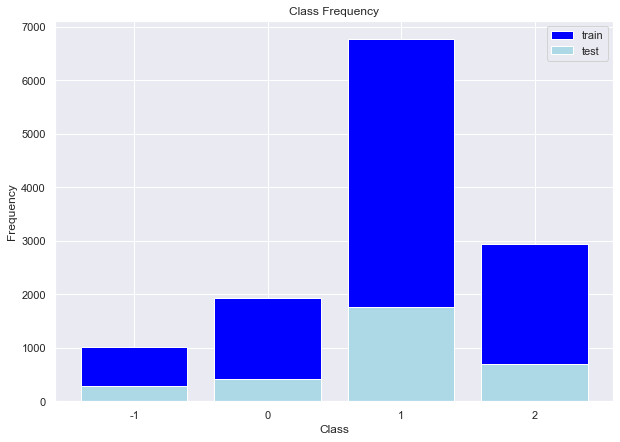

 1    8530
 2    3640
 0    2353
-1    1296
Name: sentiment, dtype: int64

In [64]:
# plot split across sentiments

unique, counts = np.unique(y_train, return_counts=True)
plt.bar(unique, counts, color="blue")
unique, counts = np.unique(y_test, return_counts=True)
plt.bar(unique, counts, color="lightblue")

plt.title("Class Frequency")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.xticks(ticks=[1,2,0,-1], labels=[1,2,0,-1])
plt.legend(["train", "test"])

plt.show()
y.value_counts()

 <a id="six"></a>
## 6. Modelling
<a href=#linkup>Back to Table of Contents</a>

---
    
## <center>| ⚡ Description ⚡ |

**<center>Developing model and evaluate accuracy.<center>**

---

<a id="six_zero"></a>
### 6.0. Improve model individually

<a href=#six>Back to Modelling</a>

In [63]:
# parameters = {"kernel":("linear", "rbf"), 
#               "C":(0.25,1.0),
#               "gamma": (1,2)}

# svm = SVC()
# model = GridSearchCV(svm, parameters)

In [185]:
model = LogisticRegression(max_iter=500)

# RandomForestClassifier(n_estimators = 100)
# LinearSVC(C=0.01)
# LogisticRegression(max_iter=500)
# RandomForestClassifier(n_estimators=1000, random_state=0)


In [187]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=500)

In [189]:
y_pred_prog = model.predict(X_test)

In [75]:
np.unique(y_pred_prog)

array([-1,  0,  1,  2], dtype=int64)

In [68]:
# model.best_params_

<a id="six_one"></a>
### 6.1. Model Performance

<a href=#six>Back to Modelling</a>

In [190]:
Accuracy_prog = accuracy_score(y_test, y_pred_prog)
Precision_prog = precision_score(y_test, y_pred_prog, average="micro")
Recall_prog = recall_score(y_test, y_pred_prog, average="micro")
F1_Score_prog = f1_score(y_test, y_pred_prog, average="micro")

(Accuracy_prog, Precision_prog, Recall_prog, F1_Score_prog)

(0.7006953223767383,
 0.7006953223767383,
 0.7006953223767383,
 0.7006953223767383)

In [191]:
confusion_prog = confusion_matrix(y_test, y_pred_prog)
class_report_prog = classification_report(y_test, y_pred_prog)
print(class_report_prog)
confusion_prog

              precision    recall  f1-score   support

          -1       0.79      0.27      0.40       278
           0       0.50      0.34      0.40       425
           1       0.71      0.87      0.78      1755
           2       0.74      0.67      0.70       706

    accuracy                           0.70      3164
   macro avg       0.68      0.54      0.57      3164
weighted avg       0.70      0.70      0.68      3164



array([[  74,   50,  143,   11],
       [   6,  145,  253,   21],
       [  11,   81, 1528,  135],
       [   3,   16,  217,  470]], dtype=int64)

In [71]:
# y_pred_prog.shape

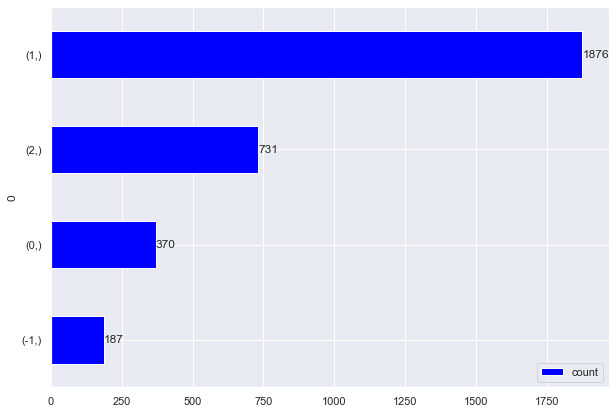

In [72]:
# plot count of each sentiment in prediction

see = pd.DataFrame(pd.DataFrame(y_pred_prog).value_counts(), columns=["count"])

ax = see.sort_values("count").plot(kind="barh", color="blue")
ax.bar_label(ax.containers[0])
plt.show()

<a id="six_two"></a>
### 6.2. Run all models

<a href=#six>Back to Modelling</a>

In [73]:
names = ["Logistic Regression", "Nearest Neighbors", "Support Vector Machines"]

In [74]:
classifiers = [LogisticRegression(max_iter=500), KNeighborsClassifier(3), SVC(kernel="rbf", C=1, gamma=1)]

In [75]:
# results = []

# models = {}
# confusion = {}
# class_report = {}


# for name, clf in zip(names, classifiers):    
#     print ("Fitting {:s} model...".format(name))
#     run_time = %timeit -q -o clf.fit(X_train, y_train)
    
#     print ("... predicting") 
#     y_pred = clf.predict(X_test)
    
#     print ("... scoring")
#     accuracy  = metrics.accuracy_score(y_test, y_pred)
#     precision = metrics.precision_score(y_test, y_pred, average="micro")
#     recall    = metrics.recall_score(y_test, y_pred, average="micro")
#     f1_test        = metrics.f1_score(y_test, y_pred, average="micro")    
    
#     # Save the results to dictionaries
#     models[name] = clf    
#     confusion[name] = metrics.confusion_matrix(y_test, y_pred)
#     class_report[name] = metrics.classification_report(y_test, y_pred)
    
#     results.append([name, accuracy, precision, recall, f1_test, run_time.best])

    
# results = pd.DataFrame(results, columns=["Classifier", "Accuracy", "Precision", "Recall", "F1 Test", "Train Time"])
# results.set_index("Classifier", inplace= True)

# print ("... All done!")

In [76]:
# results.sort_values("F1 Test", ascending=False)

In [77]:
# print(class_report["Logistic Regression"])
# confusion["Logistic Regression"]

<a id="six_three"></a>
### 6.3. Kaggle Submission

<a href=#six>Back to Modelling</a>

In [78]:
def predict_unseen(X_train, y_train, X_test, model):
    # function to predict Unseen data
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    return predictions

def save_sub(series, col_file="test.csv", file="sample_submission.csv"):
    # function to save submission
    my_series = pd.Series(series)
    prediction = my_series.to_frame()
    prediction = prediction.rename(columns = {0:"sentiment"})
    tweetid = pd.read_csv(col_file)[["tweetid"]]
    sample = tweetid.join(other = prediction)
    sample.to_csv(file, index=False)

In [79]:
# data preprocessing

unseen = pd.read_csv("test.csv", index_col=["tweetid"])
unseen["message"] = unseen.loc[:, "message"].str.encode("ascii", "ignore").str.decode("ascii")
unseen.replace({"message": pattern_replace}, regex=True, inplace=True)
unseen["message"] = unseen["message"].apply(remove_punctuation_numbers_caps)
unseen["clean"] = unseen["message"].apply(remove_stop_words)
unseen["tokens"] = unseen["clean"].apply(tokeniser.tokenize)
# unseen["stem"] = unseen["tokens"].apply(word_stemmer, args=(stemmer, ))
# unseen["stem_list"] = [" ".join(map(str, l)) for l in unseen["stem"]]
unseen["lemma"] = unseen["tokens"].apply(word_lemma, args=(lemmatizer, ))
unseen["lemma_str"] = [" ".join(map(str, l)) for l in unseen["lemma"]]
X_unseen = vect.transform(unseen["lemma_str"])
X_unseen_df = pd.DataFrame(X_unseen.A)

In [80]:
X_unseen_df.shape

(10546, 14825)

In [81]:
y_test_pred = predict_unseen(X_df, y, X_unseen_df, LogisticRegression(max_iter=500)) #observed to have better score (A)
# y_test_pred = model.predict(X_unseen_df) # (B)

In [82]:
np.unique(y_test_pred)

array([-1,  0,  1,  2], dtype=int64)

In [83]:
save_sub(y_test_pred, col_file="test.csv", file="submissions/sample_submission_lemma_logreg_base.csv")

 <a id="seven"></a>
## 7. End Comet Experiment
<a href=#linkup>Back to Table of Contents</a>

---
    
## <center>| ⚡ Description ⚡ |

**<center>Create logs and ending experiment.<center>**

---

In [84]:
# # Create dictionaries for data to be logged

# params = {"clean": "punc_num_cap",
#           "word stem": "lemmatizer",
#           "resample": False,
#           "feature extraction": "CountVectorizer(max_df=5000, min_df=5)",
#           "scaler": False,
#           "test size": 0.2,
#           "stratify": False,
#           "random_state": 42,
#           "model_type": "LogisticRegression(max_iter=500)",
#           "param grid": False
#           }
# metrics_score = {"f1": F1_Score_prog,
#            "recall": Recall_prog,
#            "precision": Precision_prog,
#            "acuracy": Accuracy_prog
#            }

In [85]:
# # Log our parameters and results

# experiment.log_parameters(params)
# experiment.log_metrics(metrics_score)
# experiment.log_confusion_matrix(y_test, y_pred_prog)

In [86]:
# experiment.end()

In [87]:
# experiment.display()

 <a id="eight"></a>
## 8. Extra
<a href=#linkup>Back to Table of Contents</a>

---
    
## <center>| ⚡ Description ⚡ |

**<center>Additional material.<center>**

---

In [91]:
# Pickle model for use within app
save_path = r"C:\Users\ADEBOWALE Tosin\Desktop\tee\Explore\predict\06 - Advanced Classification\EDSA_Climate_Change_Belief_Analysis_2022_Team_NM3\2_Streamlit_and_AWS\resources\NM3_model.pkl"
print (f"Saving model to: {save_path}")
pickle.dump(model, open(save_path,'wb'))

Saving model to: C:\Users\ADEBOWALE Tosin\Desktop\tee\Explore\predict\06 - Advanced Classification\EDSA_Climate_Change_Belief_Analysis_2022_Team_NM3\2_Streamlit_and_AWS\resources\NM3_model.pkl


In [90]:
# Pickle vectorizer for use within app
save_path = r"C:\Users\ADEBOWALE Tosin\Desktop\tee\Explore\predict\06 - Advanced Classification\EDSA_Climate_Change_Belief_Analysis_2022_Team_NM3\2_Streamlit_and_AWS\resources\NM3_vect.pkl"
print (f"Saving vectorizer to: {save_path}")
pickle.dump(vect, open(save_path,'wb'))

Saving vectorizer to: C:\Users\ADEBOWALE Tosin\Desktop\tee\Explore\predict\06 - Advanced Classification\EDSA_Climate_Change_Belief_Analysis_2022_Team_NM3\2_Streamlit_and_AWS\resources\NM3_vect.pkl
